<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# Weather Research & Forecasting Model coupled to Chemistry (WRF-CHEM)

<br>
<div class="alert alert-block alert-warning" align="left">
<b>ATTENTION:</b><br> This notebook requires Python 3.9. Hence, you have to change the default kernel (Python 3.8) to the kernel `python3.9` in order to run this notebook.
</div>

### About

The [WRF-CHEM](https://ruc.noaa.gov/wrf/wrf-chem/) is the Weather Research & Forecasting Model coupled to Chemistry. The model simulates the emission, transport, mixing, and chemical transformation of trace gases and aerosols simultaneously with the meteorology.
The model is used for investigation of regional-scale air quality, field program analysis, and cloud-scale interactions between clouds and chemistry.

The development of WRF-Chem is a collaborative effort among the community. NOAA/ESRL scientists are the leaders and maintainers of the code.
Find more information about the WRF-CHEM model in the [user guide](https://ruc.noaa.gov/wrf/wrf-chem/Users_guide.pdf).

### Basic Facts

> **Spatial resolution**: `1 deg x 1 deg`<br>
> **Spatial coverage**: `Global` <br>
> **Temporal resolution**: `hourly` <br>

### How to access the data

You can register and download WRF-Chem outputs at the [WRF Model Download page](https://www2.mmm.ucar.edu/wrf/users/download/get_source.html). Raw model output is available at the [NCAR Research Data Archive (NCAR RDA ds340.0)](https://rda.ucar.edu/datasets/ds340.0/) for research purposes.

### Module outline
- [1 - Load and browse WRF-CHEM model outputs](#wrf_load)
- [2 - Visualize Ozone mixing ratio for one level and timestep](#visualize_wrf)
- [3 - Animate the Ozone mixing ratio for one pressure level over several timesteps](#animate_wrf)
- [4 - Visualize NOx time-series for Kathmandu](#wrf_ts)
- [5 - Create a vertical profile of Ozone for the point location Kathmandu](#vertical_profile)

<hr>

#### Load required libraries

In [27]:
import glob

import xarray as xr
import pandas as pd
import netCDF4 as nc

from wrf import to_np, getvar, ll_to_xy, latlon_coords, extract_times

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.cm import get_cmap

from IPython.display import Image, display, HTML

#### Load helper functions

In [3]:
%run ../functions.ipynb

<hr>

## <a id='wrf_load'></a>Load and browse WRF-CHEM model outputs

Some WRF-CHEM model outputs from 2 May 2023 have been uploaded to the training platform and are available under the following folder: `../../eodata/acam_training_school/WRF/`. The first step is to create a list of file paths. You can use the python package `glob` to create a list of all file paths that match a specific pattern.

In [4]:
file_paths = glob.glob("../../eodata/acam_training_school/WRF/wrfout_d01_2023-05-02*")
file_paths.sort()

print(file_paths)

['../../eodata/acam_training_school/WRF/wrfout_d01_2023-05-02_10:00:00', '../../eodata/acam_training_school/WRF/wrfout_d01_2023-05-02_11:00:00', '../../eodata/acam_training_school/WRF/wrfout_d01_2023-05-02_12:00:00', '../../eodata/acam_training_school/WRF/wrfout_d01_2023-05-02_13:00:00', '../../eodata/acam_training_school/WRF/wrfout_d01_2023-05-02_14:00:00', '../../eodata/acam_training_school/WRF/wrfout_d01_2023-05-02_15:00:00']


<br>

In a next step, we open one data file to inspect the structure and content. The WRF-CHEM outputs are disseminated in the `netCDF` format. Hence, you can use xarray's function `open_dataset()` to open the file. 

Once opened, you see that one WRF-CHEM output is organised in 10 dimensions and contains 276 variables

In [5]:
wrf_file = xr.open_dataset(file_paths[0])
wrf_file

<xarray.Dataset>
Dimensions:                (Time: 1, south_north: 338, west_east: 365,
                            bottom_top: 37, klevs_for_dvel: 1,
                            bottom_top_stag: 38, soil_layers_stag: 4,
                            west_east_stag: 366, south_north_stag: 339,
                            seed_dim_stag: 2)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                klevs_for_dvel, bottom_top_stag,
                                soil_layers_stag, west_east_stag,
                                south_north_stag, seed_dim_stag
Data variables: (12/276)
    Times                  (Time) |S19 ...
    AOD2D_OUT              (Time, south_north, west_east) float32 ...
    ATOP2D_OUT             (Time, south_north, west_east) float32 ...
    ICN_DIAG               (Time, bottom_top, south_north, west_east) float32 ...
    NC_DIAG                (Time, bottom_top, south_north, west_east) float32 ...
    CLDFRA2                (Time, bottom_top, south_north, west_east) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/139)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2023-05-02_06:00:00
    SIMULATION_START_DATE:           2023-05-02_06:00:00
    WEST-EAST_GRID_DIMENSION:        366
    SOUTH-NORTH_GRID_DIMENSION:      339
    BOTTOM-TOP_GRID_DIMENSION:       38
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0

### Load a specific variable from the dataset

The next step is to use the function `getvar()` from the Python library `wrf_python`. The function requires the name of the variable and a data file as `netCDF4 Dataset` object. The example loads the variable Ozone for the first file in the list of files.

The function loads the file as xarray.DataArray, which provides additional attribute information about the selected parameter.

In [6]:
variable = 'o3'
param = getvar(nc.Dataset(file_paths[0]), variable)
param

<xarray.DataArray 'o3' (bottom_top: 37, south_north: 338, west_east: 365)>
array([[[0.02460654, 0.02460647, 0.02507564, ..., 0.03624841,
         0.03560099, 0.03494742],
        [0.02406092, 0.02461134, 0.02507956, ..., 0.03731778,
         0.03630479, 0.03501407],
        [0.02429441, 0.02491808, 0.02540462, ..., 0.03797777,
         0.03683848, 0.03508696],
        ...,
        [0.04564356, 0.04604648, 0.04568885, ..., 0.06440917,
         0.06605069, 0.06807061],
        [0.04506238, 0.04555163, 0.04517766, ..., 0.05974674,
         0.06459487, 0.0678286 ],
        [0.04438594, 0.04426455, 0.04413244, ..., 0.0599523 ,
         0.06459755, 0.06460309]],

       [[0.02462155, 0.02462153, 0.02508898, ..., 0.03626864,
         0.03562106, 0.03496732],
        [0.02410767, 0.02462296, 0.02508918, ..., 0.03759319,
         0.03662915, 0.03503278],
        [0.02434266, 0.02493012, 0.02541474, ..., 0.03814342,
         0.03701522, 0.03510518],
...
        [1.3163916 , 1.3115966 , 1.3088325 , ..., 1.9920864 ,
         1.9794377 , 1.9794374 ],
        [1.3165731 , 1.3173531 , 1.3155245 , ..., 1.9169217 ,
         1.9119426 , 1.9119428 ],
        [1.3174341 , 1.3159478 , 1.3145628 , ..., 1.9169222 ,
         1.9119426 , 1.9119426 ]],

       [[1.3214222 , 1.318378  , 1.3147756 , ..., 1.5809238 ,
         1.5967101 , 1.59671   ],
        [1.3113213 , 1.3092425 , 1.3068683 , ..., 1.5809238 ,
         1.59671   , 1.59671   ],
        [1.3011838 , 1.2995546 , 1.2977463 , ..., 1.5813017 ,
         1.601721  , 1.6017212 ],
        ...,
        [1.6474283 , 1.6474283 , 1.6429931 , ..., 2.6395998 ,
         2.6412778 , 2.6412778 ],
        [1.6401669 , 1.6401668 , 1.6317496 , ..., 2.6290472 ,
         2.633584  , 2.633584  ],
        [1.6401668 , 1.6401668 , 1.6317496 , ..., 2.6290472 ,
         2.633584  , 2.633584  ]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 62.42 62.53 62.63 ... 105.4 105.6
    XLAT     (south_north, west_east) float32 3.894 3.907 3.92 ... 39.32 39.3
    XTIME    float32 240.0
    Time     datetime64[ns] 2023-05-02T10:00:00
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  O3 mixing ratio
    units:        ppmv
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=81.12899780273438, moad_cen_lat=...

In a next step, we can define distinct variables for the latitude and longitude coordinates. This will be of use later for the data visualisation. It further provides an overview on the geographical extent and spatial resolution. 

The function `latlon_coords()` from the Python package `wrf_python` returns two data arrays for the longitude and latitude coordinates respectively.

In [7]:
lats, lons = latlon_coords(param)
lats, lons

(<xarray.DataArray 'XLAT' (south_north: 338, west_east: 365)>
 array([[ 3.89402  ,  3.90699  ,  3.919899 , ...,  3.919899 ,  3.90699  ,
          3.89402  ],
        [ 3.995491 ,  4.0084686,  4.0214005, ...,  4.0214005,  4.0084686,
          3.995491 ],
        [ 4.097    ,  4.1100006,  4.12294  , ...,  4.12294  ,  4.1100006,
          4.097    ],
        ...,
        [39.095318 , 39.112392 , 39.12937  , ..., 39.12937  , 39.112392 ,
         39.095318 ],
        [39.19737  , 39.214447 , 39.23144  , ..., 39.23144  , 39.214447 ,
         39.19737  ],
        [39.29938  , 39.31647  , 39.333454 , ..., 39.333454 , 39.31647  ,
         39.29938  ]], dtype=float32)
 Coordinates:
     XLONG    (south_north, west_east) float32 62.42 62.53 62.63 ... 105.4 105.6
     XLAT     (south_north, west_east) float32 3.894 3.907 3.92 ... 39.32 39.3
     XTIME    float32 240.0
     Time     datetime64[ns] 2023-05-02T10:00:00
 Dimensions without coordinates: south_north, west_east,
 <xarray.DataArray 'XLONG

Additionally, you can also save the `description` attribute as a variable. This can be used for the title of the final map.

In [8]:
longname = param.description
longname

'O3 mixing ratio'

### Convert ozone values from ppm to ppb

Per default, the ozone mixing ratio is provided in parts per million (ppm). However, a more common unit used for the ozone mixing ratio is parts per billion (ppb). Hence, in the following step, the ozone values are converted from ppm to ppb by multiplying the values with 1000.

In [9]:
o3_ppb = param*1000
o3_ppb

<xarray.DataArray 'o3' (bottom_top: 37, south_north: 338, west_east: 365)>
array([[[  24.60654 ,   24.60647 ,   25.075642, ...,   36.248413,
           35.600986,   34.947422],
        [  24.060917,   24.611338,   25.079563, ...,   37.317783,
           36.304794,   35.014072],
        [  24.294415,   24.918077,   25.404617, ...,   37.977776,
           36.838478,   35.086956],
        ...,
        [  45.64356 ,   46.046482,   45.688854, ...,   64.409164,
           66.05069 ,   68.0706  ],
        [  45.062378,   45.55163 ,   45.17766 , ...,   59.74674 ,
           64.59487 ,   67.8286  ],
        [  44.38594 ,   44.26455 ,   44.132442, ...,   59.952297,
           64.59756 ,   64.60309 ]],

       [[  24.621552,   24.621532,   25.088984, ...,   36.268635,
           35.621063,   34.967323],
        [  24.107672,   24.622963,   25.089178, ...,   37.59319 ,
           36.629147,   35.032784],
        [  24.34266 ,   24.930119,   25.414736, ...,   38.143417,
           37.015217,   35.105175],
...
        [1316.3916  , 1311.5967  , 1308.8325  , ..., 1992.0864  ,
         1979.4377  , 1979.4374  ],
        [1316.5731  , 1317.3531  , 1315.5244  , ..., 1916.9218  ,
         1911.9426  , 1911.9429  ],
        [1317.4341  , 1315.9478  , 1314.5627  , ..., 1916.9222  ,
         1911.9426  , 1911.9426  ]],

       [[1321.4222  , 1318.3779  , 1314.7756  , ..., 1580.9238  ,
         1596.7101  , 1596.71    ],
        [1311.3213  , 1309.2424  , 1306.8683  , ..., 1580.9238  ,
         1596.71    , 1596.71    ],
        [1301.1838  , 1299.5546  , 1297.7463  , ..., 1581.3016  ,
         1601.7211  , 1601.7212  ],
        ...,
        [1647.4282  , 1647.4282  , 1642.993   , ..., 2639.5999  ,
         2641.2778  , 2641.2778  ],
        [1640.1669  , 1640.1667  , 1631.7496  , ..., 2629.047   ,
         2633.584   , 2633.584   ],
        [1640.1667  , 1640.1667  , 1631.7496  , ..., 2629.047   ,
         2633.584   , 2633.584   ]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 62.42 62.53 62.63 ... 105.4 105.6
    XLAT     (south_north, west_east) float32 3.894 3.907 3.92 ... 39.32 39.3
    XTIME    float32 240.0
    Time     datetime64[ns] 2023-05-02T10:00:00
Dimensions without coordinates: bottom_top, south_north, west_east

## <a id='visualize_wrf'></a>Visualize Ozone mixing ratio for one level and timestep

The next step is to visualise the Ozone mixing ratio for one level and timestep. The provided WRF model outputs are for the Hindu-Kush-Himalayan (HKH) region. Hence, you can define the latitude and longitude minimum and maximum bounds based on the dataset's minimum and maximum latitude and longitude values.

In [10]:
latmin = lats.min()
latmax = lats.max()
lonmin = lons.min()
lonmax = lons.max()

For the data visualization, you can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to visualize the data. The function combines matplotlib functionalities with advanced mapping features from Cartopy. With `?visualize_pcolormesh` you can open the function's docstring to see which keyword arguments are required.

You can change the level index to visualize the Ozone mixing ration on a different pressure level.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'O3 mixing ratio(ppb) - 2023-05-02T10:00:00'}>)

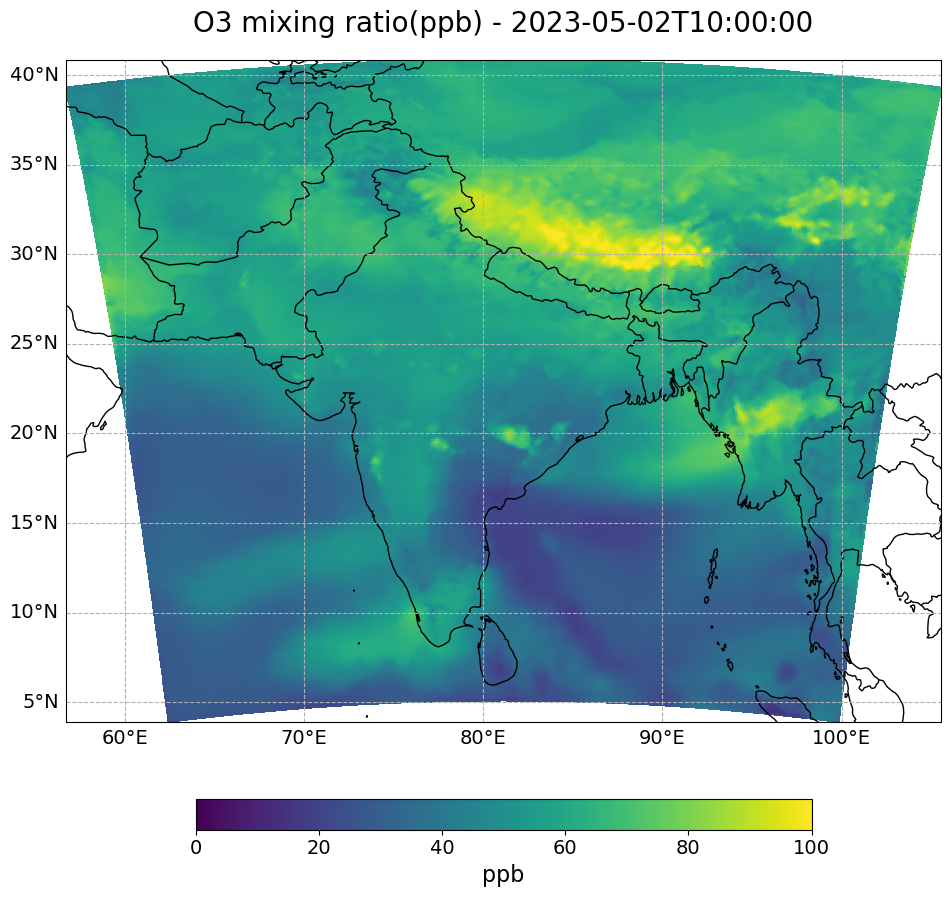

In [11]:
level = 0
visualize_pcolormesh(data_array=o3_ppb[level,:,:],
                    longitude=lons,
                    latitude=lats,
                    projection=ccrs.PlateCarree(),
                    color_scale='viridis',
                    unit='ppb',
                    long_name = longname + '(ppb) - ' + str(o3_ppb.Time.values)[0:19],
                    vmin=0,
                    vmax=100,
                    set_global=False,
                    latmin=latmin,
                    latmax=latmax,
                    lonmin=lonmin,
                    lonmax=lonmax)

## <a id='animate_wrf'></a>Animate the Ozone mixing ratio for one pressure level over several timesteps

Let us now concatenate all WRF-CHEM output data files into one xarray.DataArray. For this, we loop over all data files, load the ozone mixing ratio and append it on the dimension `Time`. The result is a dat array with the six data files concatenated at the `Time` dimension.

In [12]:
o3_combined = o3_ppb

for i in range(1,len(file_paths)):
    tmp = getvar(nc.Dataset(file_paths[i]), "o3")
    tmp_ppb = tmp*1000
    o3_combined = xr.concat([o3_combined, tmp*1000], dim='Time')

o3_combined

<xarray.DataArray 'o3' (Time: 6, bottom_top: 37, south_north: 338,
                        west_east: 365)>
array([[[[  24.60654 ,   24.60647 ,   25.075642, ...,   36.248413,
            35.600986,   34.947422],
         [  24.060917,   24.611338,   25.079563, ...,   37.317783,
            36.304794,   35.014072],
         [  24.294415,   24.918077,   25.404617, ...,   37.977776,
            36.838478,   35.086956],
         ...,
         [  45.64356 ,   46.046482,   45.688854, ...,   64.409164,
            66.05069 ,   68.0706  ],
         [  45.062378,   45.55163 ,   45.17766 , ...,   59.74674 ,
            64.59487 ,   67.8286  ],
         [  44.38594 ,   44.26455 ,   44.132442, ...,   59.952297,
            64.59756 ,   64.60309 ]],

        [[  24.621552,   24.621532,   25.088984, ...,   36.268635,
            35.621063,   34.967323],
         [  24.107672,   24.622963,   25.089178, ...,   37.59319 ,
            36.629147,   35.032784],
         [  24.34266 ,   24.930119,   25.414736, ...,   38.143417,
            37.015217,   35.105175],
...
         [1310.377   , 1300.3717  , 1290.0234  , ..., 1884.8351  ,
          1869.4792  , 1869.4794  ],
         [1310.9575  , 1303.5295  , 1296.3168  , ..., 1873.0685  ,
          1888.4093  , 1888.4088  ],
         [1312.696   , 1311.1674  , 1309.7793  , ..., 1873.0685  ,
          1888.4093  , 1888.4093  ]],

        [[1471.8708  , 1472.7694  , 1472.0894  , ..., 1496.1826  ,
          1509.5924  , 1509.5924  ],
         [1463.5844  , 1460.0851  , 1456.9695  , ..., 1496.1826  ,
          1509.5924  , 1509.5924  ],
         [1455.2944  , 1450.9187  , 1446.8242  , ..., 1493.9989  ,
          1512.7607  , 1512.7609  ],
         ...,
         [1619.3018  , 1619.3018  , 1614.1737  , ..., 2562.7668  ,
          2592.6428  , 2592.6428  ],
         [1601.598   , 1601.598   , 1590.2089  , ..., 2584.3796  ,
          2604.517   , 2604.517   ],
         [1551.71    , 1546.9     , 1542.4052  , ..., 2584.3796  ,
          2604.517   , 2604.517   ]]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 62.42 62.53 62.63 ... 105.4 105.6
    XLAT     (south_north, west_east) float32 3.894 3.907 3.92 ... 39.32 39.3
    XTIME    (Time) float32 240.0 300.0 1.8e+03 1.86e+03 480.0 540.0
  * Time     (Time) datetime64[ns] 2023-05-02T10:00:00 ... 2023-05-02T15:00:00
Dimensions without coordinates: bottom_top, south_north, west_east

In the next step, you can animate the `Ozone mixing ratio` in order to see how the trace gas develops over a period of several hours on 2 May 2023.
You can do animations with matplotlib's function `animation`. Jupyter's function `HTML` can then be used to display HTML and video content.

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function.

In [13]:
level = 0
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=o3_combined[0,level,:,:],
                               longitude=lons, 
                               latitude=lats,
                               projection=ccrs.PlateCarree(), 
                               color_scale='viridis', 
                               unit='ppb',
                               long_name=longname + '(ppb) - ' + str(o3_ppb.Time.values)[0:19],
                               vmin=0,
                               vmax=100, 
                               lonmin=lonmin, 
                               lonmax=lonmax, 
                               latmin=latmin, 
                               latmax=latmax,
                               set_global=False)

frames = 6

def draw(i):
    img = plt.pcolormesh(lons, 
                         lats, 
                         o3_combined[i,level,:,:], 
                         cmap='viridis', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=100,
                         shading='auto')
    
    ax.set_title(longname + '(ppb) - ' + str(o3_combined.Time[i].values)[0:19], fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

#### Play the animation video as HTML5 video

In [14]:
HTML(ani.to_html5_video())

<br>

## <a id='wrf_ts'></a>Visualize NOx time-series for Kathmandu

In a next step, let us retrieve Nitrogen Dioxide and Nitrogen Monoxide values for a specific location, e.g. Kathamandu, and visualize the hourly variation of NOx in Kathmandu on 2 May 2023. The function `ll_to_xy` from the `wrf_python` package helps you to convert latitude longitude value to X and Y values.

In [16]:
kathmandu = ll_to_xy(nc.Dataset(file_paths[0]), 27.7172, 85.3240)
X = kathmandu[0]
Y = kathmandu[1]
X, Y

(<xarray.DataArray 'xy' ()>
 array(217)
 Coordinates:
     latlon_coord  object CoordPair(lat=27.7172, lon=85.324)
     x_y           <U1 'x',
 <xarray.DataArray 'xy' ()>
 array(213)
 Coordinates:
     latlon_coord  object CoordPair(lat=27.7172, lon=85.324)
     x_y           <U1 'y')

<br>

The next step is then to loop over each data file, to extract the two variables `no2` and `no` as well as the timestamp. Once extracted, NOx values for Kathamandu can be computed, by building the sum of the  NO<sub>2</sub> and NO values for the point location Kathmandu. The last step is to create two lists, one with the computed NOx values and one with the respective timestamps.

In [17]:
noxValueList = []
DateTimeList = []
for timestep in range(0, len(file_paths)):
    no2 = getvar(nc.Dataset(file_paths[timestep]), 'no2')
    no = getvar(nc.Dataset(file_paths[timestep]), 'no')
    time = str(no2.Time.values)[0:19]
    
    nox_value=float(no2[0,Y,X])*1000+float(no[0,Y,X])*1000
    
    noxValueList.append(nox_value)
    DateTimeList.append(time)

The two lists from above can be cominded into a `pandas.Dataframe`.

In [18]:
df = pd.DataFrame({ 'DateTime': DateTimeList,'NOx': noxValueList})
print(df)


              DateTime       NOx
0  2023-05-02T10:00:00  0.950388
1  2023-05-02T11:00:00  0.930989
2  2023-05-02T12:00:00  1.818167
3  2023-05-02T13:00:00  2.448776
4  2023-05-02T14:00:00  3.060583
5  2023-05-02T15:00:00  3.129040


The last step is then to plot the NOx time-series for Kathmandu on 2 May 2023 between 10:00 and 15:00 UTC.

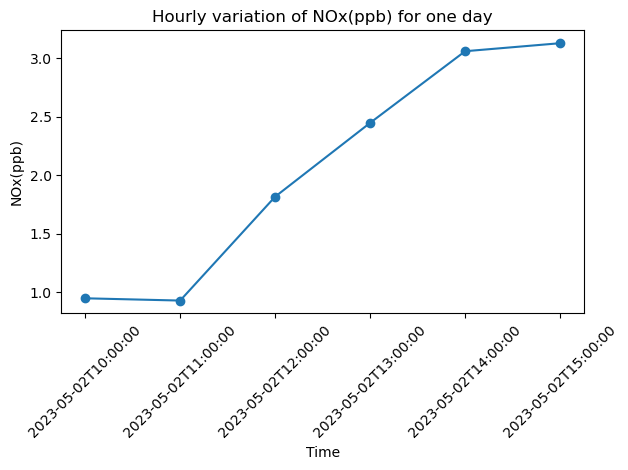

In [19]:
# Plotting the data
plt.plot(DateTimeList, noxValueList, marker='o')

# Customizing the plot
plt.title('Hourly variation of NOx(ppb) for one day')
plt.ylabel('NOx(ppb)')
plt.xlabel('Time')
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

## <a id='vertical_profile'></a>Create a vertical profile of Ozone for the point location Kathmandu

Subsequently, we would like to create a vertical profile of ozone mixing ratio for a specific point loction, e.g. Kathmandu. For this, you first have to extract three variables from one data file: 
* `o3`: Ozone mixing ratio
* `P`: Perturbation pressure
* `PB`: Base state pressure

With the variables `P` and `PB`, you can deviate the pressure level in hPa.

In [20]:
o3 = getvar(nc.Dataset(file_paths[0]), 'o3')
P = getvar(nc.Dataset(file_paths[0]), 'P')
PB = getvar(nc.Dataset(file_paths[0]), 'PB')

Once the variables are loaded, you can go over each pressure level entry and extract the Ozone value in ppb and to compute the final pressure level in hPa with the help of the P and PB variables. You can create two lists, one with the ozone values and one with the pressure levels in hPa.

In [21]:
lenHeight=P.shape[0]
o3_list=[]
plevs=[]

for i in range(lenHeight):
    o3_val = float(o3[i, Y, X])*1000
    o3_list.append(o3_val)

    P_  =  float(P[i, Y, X])
    PB_ =  float(PB[i, Y, X])
    pl = (P_ + PB_) / 100
    plevs.append(pl)

Before plotting, you can again combine the two lists created in the previous step into a `pandas.Dataframe`.

In [22]:
df = pd.DataFrame({'Pressure (hPa)': plevs, 'O3': o3_list })
print(df)

    Pressure (hPa)           O3
0       845.325469    66.289917
1       839.666016    66.726215
2       832.551563    66.819899
3       823.557578    66.914670
4       812.335312    67.011528
5       798.505312    67.132771
6       781.694453    67.409761
7       761.530703    68.879649
8       737.857109    69.487602
9       710.647734    69.729447
10      680.094219    69.345132
11      646.652266    68.198010
12      610.990117    66.431999
13      573.832461    67.547396
14      535.615273    77.663913
15      496.579805    84.465541
16      456.988789    91.744028
17      417.181953    99.331200
18      377.477813   110.662334
19      338.256953   128.589585
20      301.530840   143.797830
21      268.887461   131.521150
22      239.882656   182.712689
23      214.108945   164.527923
24      191.204609   148.181617
25      170.847871   143.884450
26      152.755518   149.337992
27      136.674268   178.168789
28      122.380273   217.661127
29      109.659600   241.351679
30      

The last step is to visualize the vertical profile of Ozone for Kathmandu on 2 May 2023 at 10:00 UTC.

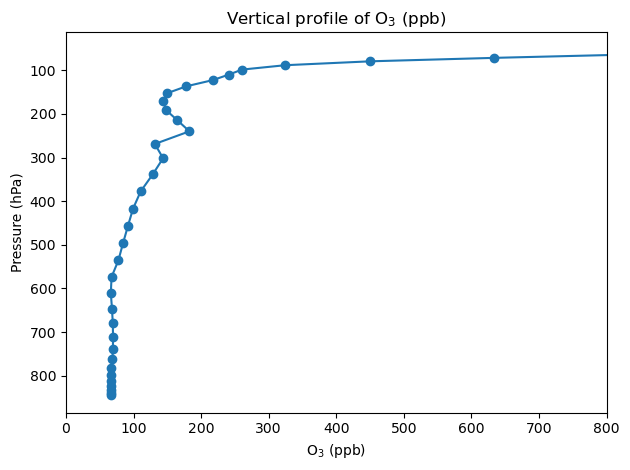

In [26]:
# Plotting the data
plt.plot(df['O3'], df['Pressure (hPa)'], marker='o')

# Customizing the plot
plt.title('Vertical profile of O$_3$ (ppb)')
plt.xlabel('O$_3$ (ppb)')
plt.ylabel('Pressure (hPa)')

plt.gca().invert_yaxis()

# Set x-axis limits
plt.xlim(0, 800)

# Displaying the plot
plt.tight_layout()
plt.show()

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>